In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
# read the data set
penguins_df = pd.read_excel("input/palmer_penguins.xlsx")
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# removing the rows containing NA (especially in feature columns that will be fitted to model)
penguins_df = penguins_df[(~np.isnan(penguins_df.flipper_length_mm) & (~np.isnan(penguins_df.body_mass_g)))]

In [4]:
# split the data set to test and train
predictors = penguins_df.body_mass_g
target_var = penguins_df.flipper_length_mm
train_x, test_x , train_y, test_y = train_test_split(predictors, target_var, test_size = 0.2)

In [6]:
# converting and reshaping the train and test values to numpy array
train_x = np.array(train_x).reshape(-1, 1)
train_y = np.array(train_y).reshape(-1, 1)
test_x = np.array(test_x).reshape(-1, 1)
test_y = np.array(test_y).reshape(-1, 1)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(273, 1)
(273, 1)
(69, 1)
(69, 1)


In [7]:
# instantiate the model
reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [18]:
# predict using trained model
prediction = reg.predict(train_x)

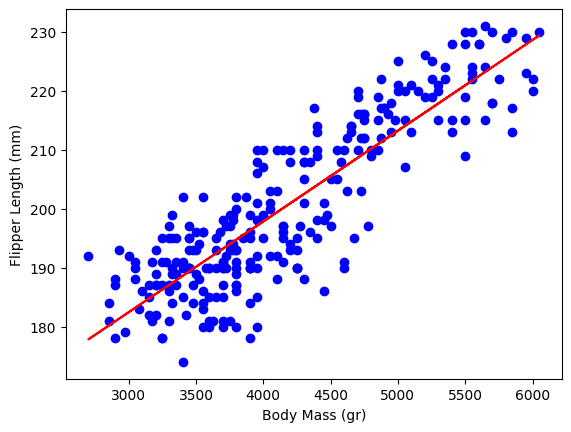

In [9]:
# visualising the model
plt.scatter(train_x, train_y, color = "blue")
plt.plot(train_x, prediction, color = "red")

plt.xlabel("Body Mass (gr)")
plt.ylabel("Flipper Length (mm)")

plt.show()

In [11]:
# evaluating model performace/accuracy (r-squared measure)
print(reg.score(test_x, test_y))

0.7586539399295334


In [21]:
# evaluating the model accuracy  (RMSE: R Mean Squared Error)
from sklearn.metrics import mean_squared_error
prediction = reg.predict(test_x)
print(mean_squared_error(test_y, prediction))

46.19924246632658
